# Système de recommandation du thèmes principal

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.neighbors import NearestNeighbors


In [ ]:
# Étape 1 : Téléverser le fichier depuis l'ordinateur
result_imdb_tmdb_final = files.upload()


Saving df_français_comedy_action.csv to df_français_comedy_action.csv


In [ ]:
# Étape 2 : Charger le fichier CSV téléversé dans un DataFrame
# Remplacez 'votre_fichier.csv' par le nom exact du fichier téléversé
df_français_comedy_action = pd.read_csv('/content/df_français_comedy_action.csv')
df_français_comedy_action.head()

,id_film,titre_original,annee_sortie,duree,genres,acteurs,personnage_film,directeur,moyenne_notes,nombre_votes,description_en,popularite,chemin_affiche,description_fr
0,tt10023150,Mon cousin,2020,104,Comedy,"['Vincent Lindon', 'Matei Dussarps', 'Pascale ...","['Pierre Pastié', 'Adrien jeune', 'Olivia Past...",Jan Kounen,5.3,706.0,Pierre is the highly successful CEO of a large...,4.697,/wRGGPn8iukAYqCwbqMyw60DH6KV.jpg,Pierre est le PDG du groupe Pastié qui réunit ...
1,tt10092752,La terre et le sang,2020,80,Action,"['Sami Bouajila', 'Eriq Ebouaney', 'Samy Seghir']","['Saïd', 'Adama', 'Yanis']",Julien Leclercq,5.2,2958.0,A sawmill owner and his teenage daughter becom...,12.913,/23S0NEXXOMhhXhF566Pw5sx7hnZ.jpg,Après plusieurs années à la tête d'une scierie...
2,tt10123698,Miss,2020,107,Comedy,"['Alexandre Wetter', 'Pascale Arbillot', 'Isab...","['Alex Dufresnoy', 'Amanda', 'Yolande']",Ruben Alves,6.4,1016.0,A young man seeking his sexual identity decide...,5.732,/fAXgta3EKncuvZeZFjT47GnVqi0.jpg,"Alex, petit garçon gracieux de 9 ans qui navig..."
3,tt10127684,Bronx,2020,116,Action,"['Lannick Gautry', 'Lannick Gautry', 'Stanisla...","['Richard', 'Anti-gang cop', 'Willy']",Olivier Marchal,6.1,10222.0,Caught in the crosshairs of police corruption ...,12.838,/9HT9982bzgN5on1sLRmc1GMn6ZC.jpg,Pris entre la corruption policière et la guerr...
4,tt10143308,Tout nous sourit,2020,101,Comedy,"['Elsa Zylberstein', 'Stéphane De Groodt', 'Gu...","['Audrey Pottier', 'Jérôme Pottier', 'Henri Po...",Mélissa Drigeard,5.4,371.0,"The members of an apparently happy couple, eac...",2.680,/uyZG3WYk3oUqbRYunL92N8MFzZT.jpg,Tout sourit à Audrey et Jérôme. Ils ont trois ...


In [ ]:
https://api.themoviedb.org/3/tv/{tt10127684}/videos

In [ ]:
df_français_comedy_action["index_original"] = df_français_comedy_action.index

In [ ]:
df_français_comedy_action.head()

,id_film,titre_original,annee_sortie,duree,genres,acteurs,personnage_film,directeur,moyenne_notes,nombre_votes,description_en,popularite,chemin_affiche,description_fr,index_original
0,tt10023150,Mon cousin,2020,104,Comedy,"['Vincent Lindon', 'Matei Dussarps', 'Pascale ...","['Pierre Pastié', 'Adrien jeune', 'Olivia Past...",Jan Kounen,5.3,706.0,Pierre is the highly successful CEO of a large...,4.697,/wRGGPn8iukAYqCwbqMyw60DH6KV.jpg,Pierre est le PDG du groupe Pastié qui réunit ...,0
1,tt10092752,La terre et le sang,2020,80,Action,"['Sami Bouajila', 'Eriq Ebouaney', 'Samy Seghir']","['Saïd', 'Adama', 'Yanis']",Julien Leclercq,5.2,2958.0,A sawmill owner and his teenage daughter becom...,12.913,/23S0NEXXOMhhXhF566Pw5sx7hnZ.jpg,Après plusieurs années à la tête d'une scierie...,1
2,tt10123698,Miss,2020,107,Comedy,"['Alexandre Wetter', 'Pascale Arbillot', 'Isab...","['Alex Dufresnoy', 'Amanda', 'Yolande']",Ruben Alves,6.4,1016.0,A young man seeking his sexual identity decide...,5.732,/fAXgta3EKncuvZeZFjT47GnVqi0.jpg,"Alex, petit garçon gracieux de 9 ans qui navig...",2
3,tt10127684,Bronx,2020,116,Action,"['Lannick Gautry', 'Lannick Gautry', 'Stanisla...","['Richard', 'Anti-gang cop', 'Willy']",Olivier Marchal,6.1,10222.0,Caught in the crosshairs of police corruption ...,12.838,/9HT9982bzgN5on1sLRmc1GMn6ZC.jpg,Pris entre la corruption policière et la guerr...,3
4,tt10143308,Tout nous sourit,2020,101,Comedy,"['Elsa Zylberstein', 'Stéphane De Groodt', 'Gu...","['Audrey Pottier', 'Jérôme Pottier', 'Henri Po...",Mélissa Drigeard,5.4,371.0,"The members of an apparently happy couple, eac...",2.680,/uyZG3WYk3oUqbRYunL92N8MFzZT.jpg,Tout sourit à Audrey et Jérôme. Ils ont trois ...,4


In [ ]:
# transformation qui nous aidera pour encodage par la suite
df_français_comedy_action['acteurs'] = df_français_comedy_action['acteurs'].apply(lambda liste: eval(liste))

In [ ]:
# transformation qui nous aidera pour encodage par la suite
df_français_comedy_action['genres'] = df_français_comedy_action['genres'].apply(lambda x: x.split(","))

In [ ]:
# transformation qui nous aidera pour encodage par la suite
df_français_comedy_action['directeur'] = df_français_comedy_action['directeur'].apply(lambda x: x.split(","))

In [ ]:
# rappel du nombre de lignes (films) et colonnes
df_français_comedy_action.shape

(206, 15)

# extraction pour streamlit

In [ ]:
# Sauvegarder le DataFrame dans un fichier CSV pour un usage ultérieur
df_français_comedy_action.to_csv('df_français_comedy_action02.csv', index=False)

# Explications :
# - 'df_français_comedy_action02.csv' : Nom du fichier CSV où les données seront sauvegardées.
# - index=False : Empêche l'inclusion de l'index du DataFrame comme une colonne supplémentaire dans le fichier CSV.

## quelques visualisation des variables numérique

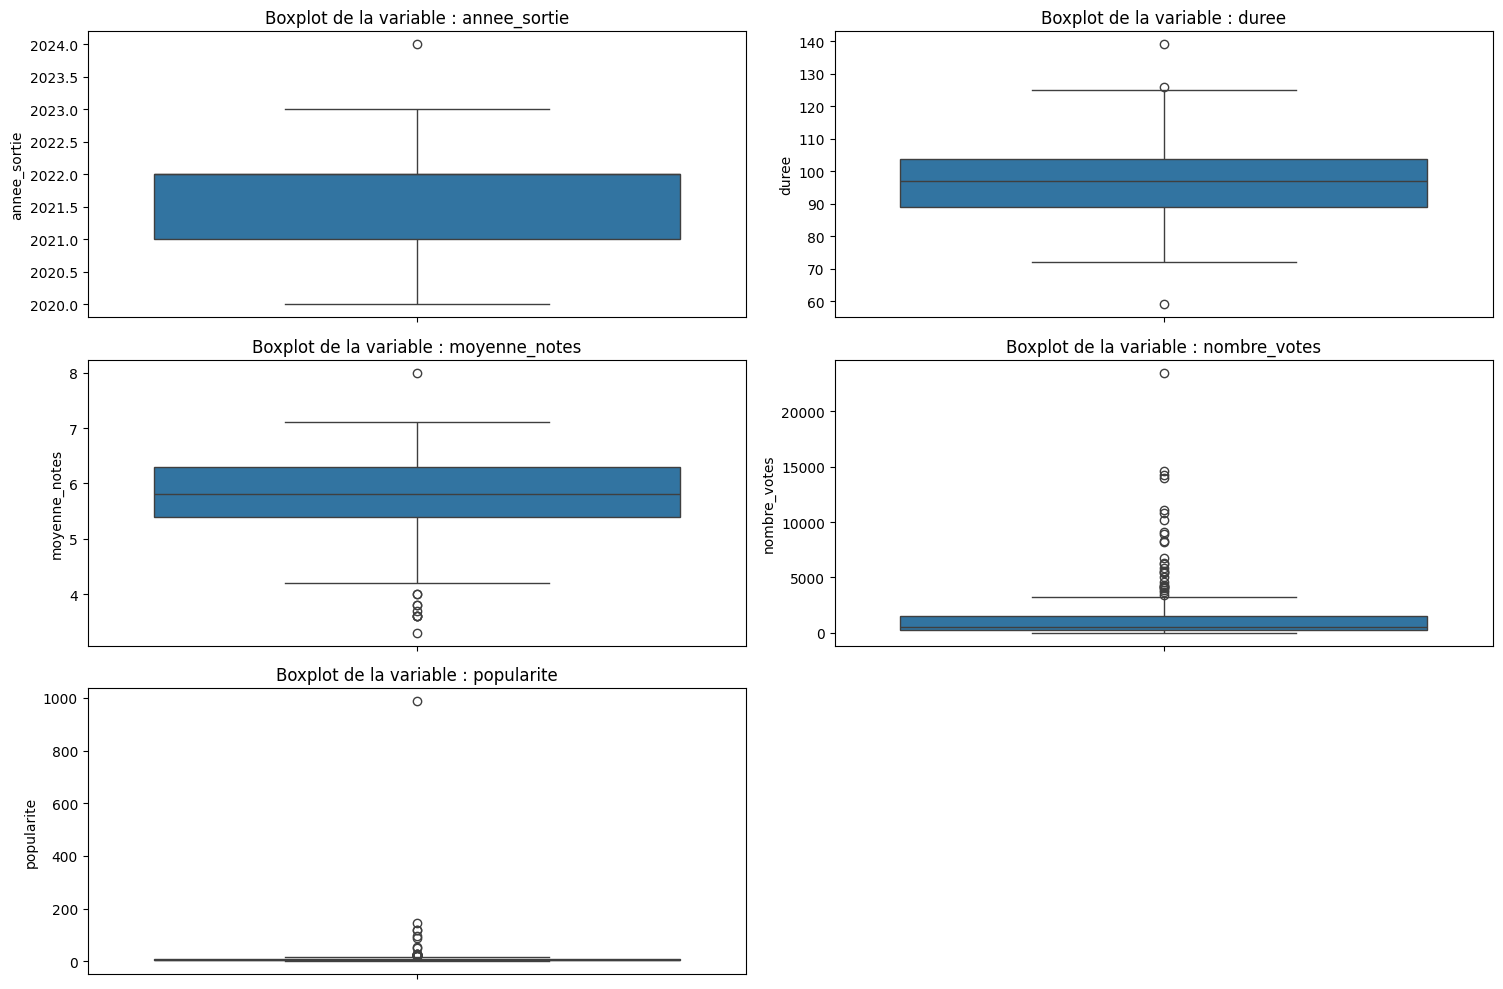

In [ ]:
# Crée une figure avec des sous-graphiques
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Liste des colonnes numériques
cols_num = df_français_comedy_action.select_dtypes("number").drop(['index_original'], axis=1).columns.tolist()

# Boucle sur les axes et les colonnes
for axe, col in zip(axes.flat, cols_num):
  sns.boxplot(data=df_français_comedy_action, y=col, ax=axe)
  axe.set_title(f'Boxplot de la variable : {col}')  # Ajoute un titre à chaque boxplot

# Désactive les axes inutilisés si le nombre de colonnes est inférieur au nombre total de sous-graphiques
for axe in axes.flat[len(cols_num):]:
  axe.set_visible(False)

# Ajustement pour éviter les chevauchements
plt.tight_layout()
plt.show()


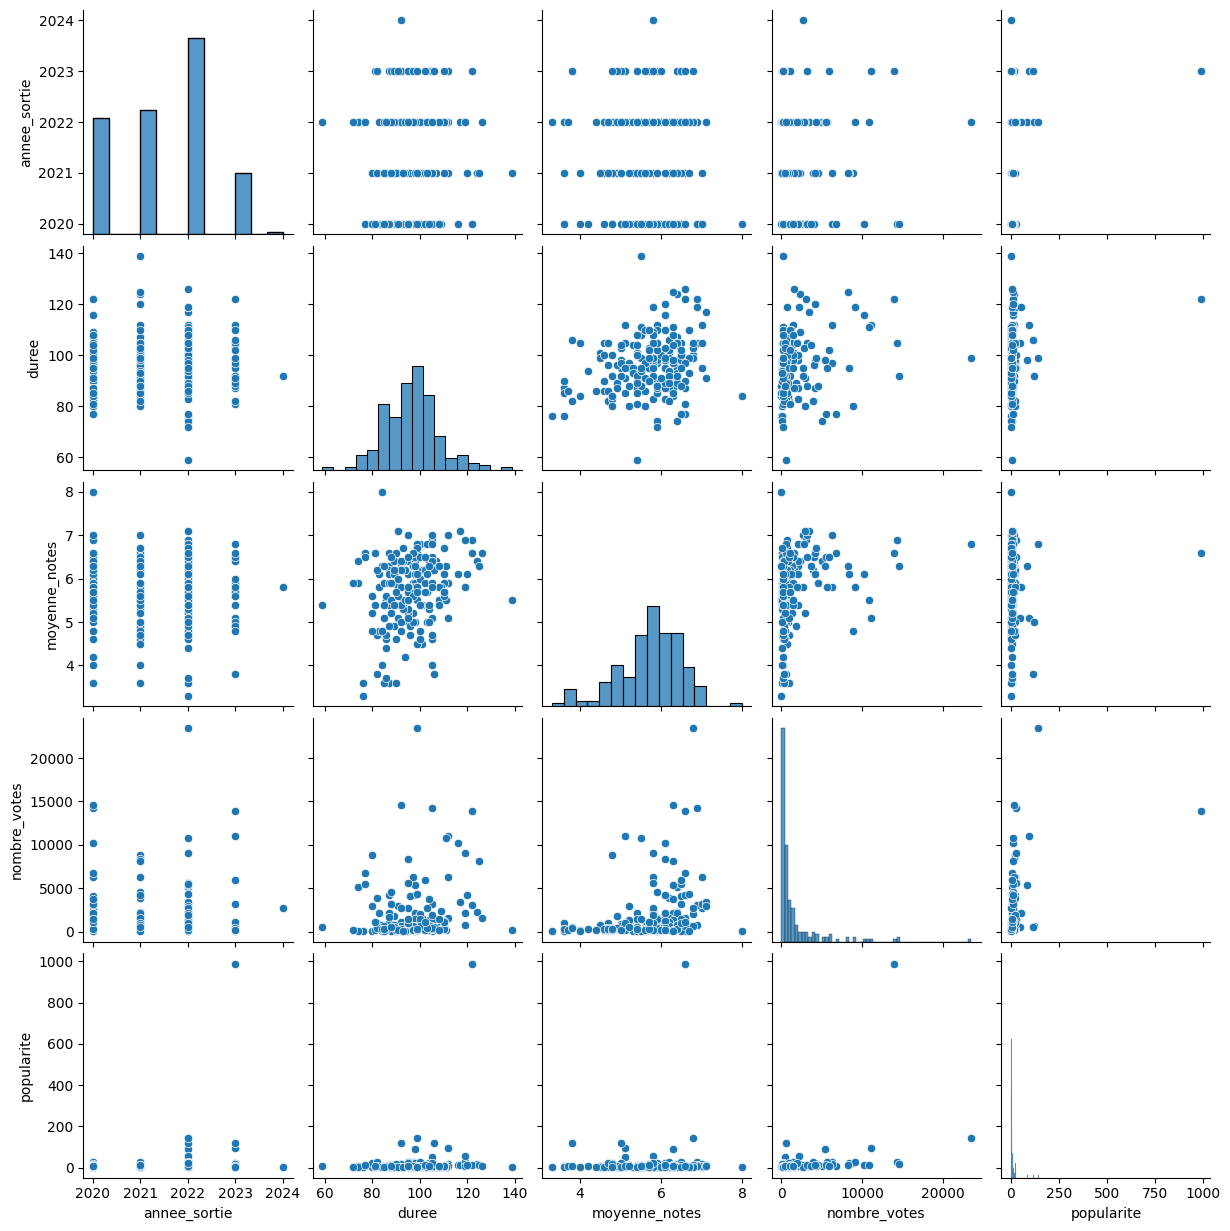

In [ ]:
# création d'un paiplot
df_pairplot = df_français_comedy_action.select_dtypes('number').drop(['index_original'], axis=1)
sns.pairplot(df_pairplot)

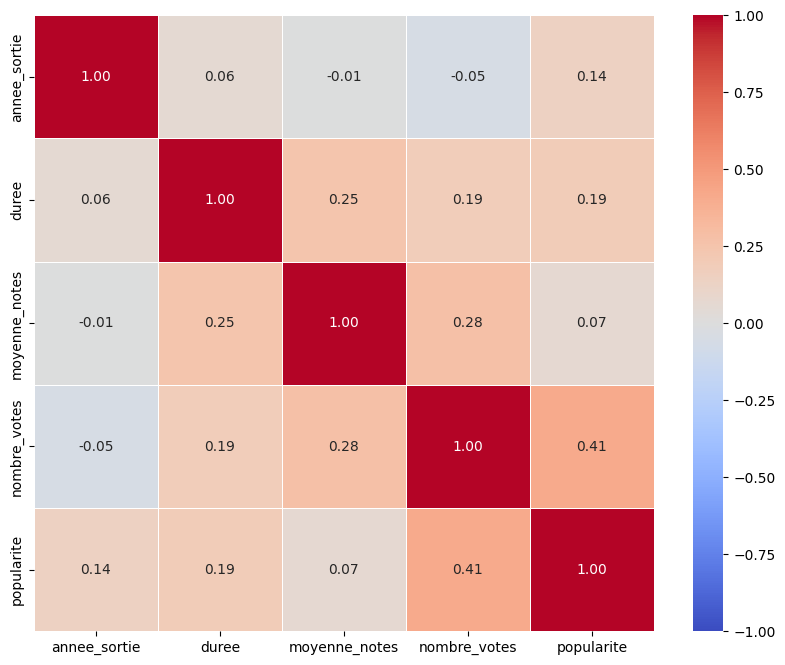

In [ ]:
# réalisation d'un heatmap pour observer les valeurs des corrélations
# calculer correlation matrix
correlation_matrix = df_français_comedy_action.select_dtypes("number").drop(['index_original'], axis=1).corr()

# Create the heatmap
plt.figure(figsize = (10,8))

sns.heatmap(
    correlation_matrix,
    cmap = 'coolwarm',
    vmin = -1,
    vmax = 1,
    center = 0,
    annot=True,
    fmt=".2f",
    linewidths=.5
    )

plt.show()

## Création de liste de pondération pour les variables numérique et catégorique

In [ ]:
df_français_comedy_action.columns

Index(['id_film', 'titre_original', 'annee_sortie', 'duree', 'genres',
       'acteurs', 'personnage_film', 'directeur', 'moyenne_notes',
       'nombre_votes', 'description_en', 'popularite', 'chemin_affiche',
       'description_fr', 'index_original'],
      dtype='object')

In [ ]:
ponderation_numerique = {
    'moyenne_notes' : 3,
    'nombre_votes' : 2,
    'duree' : 2
}

ponderation_categorique = {
    'genres' : 6,
    'acteurs' : 3,
    'directeur' : 3
}

## création d'une fonction pour appliquer la pondération sur les colonnes

In [ ]:
def appliquer_ponderation(df, ponderation):

  #Applique une pondération en dupliquant les colonnes spécifiées
  df_pondere = df.copy()

  for col, poids in ponderation.items():
    id = 1
    if col in df_pondere.columns:
      for p in range(poids - 1):
        df_pondere = pd.concat([df_pondere, df_pondere[[col]].rename( columns= { col : f"{col}_dup{id}"} )], axis=1)
        id +=1

  return df_pondere


## Séparation des colonnes numériques et catégoriques

In [ ]:
df_numerique = df_français_comedy_action.select_dtypes("number").drop(["index_original"], axis=1)
print(df_numerique)

print()
print("-" * 100)
print()

df_categorique = df_français_comedy_action.select_dtypes(exclude="number").drop(['id_film', 'titre_original', 'personnage_film', 'description_en', 'chemin_affiche',
       'description_fr'], axis=1)
print(df_categorique)

     annee_sortie  duree  moyenne_notes  nombre_votes  popularite
0            2020    104            5.3         706.0       4.697
1            2020     80            5.2        2958.0      12.913
2            2020    107            6.4        1016.0       5.732
3            2020    116            6.1       10222.0      12.838
4            2020    101            5.4         371.0       2.680
..            ...    ...            ...           ...         ...
201          2020     85            5.4         270.0       3.615
202          2021     88            5.2         486.0       7.635
203          2021    120            6.1        4210.0      13.254
204          2020     81            6.6        1073.0       5.208
205          2020     95            5.5        1459.0       7.731

[206 rows x 5 columns]

----------------------------------------------------------------------------------------------------

       genres                                            acteurs  \
0    [Comedy]

## Étape 1 : Pondération


*   pondération des valeurs numériques
*   pondération des valeurs catégoriques



In [ ]:
# Pondération des numériques (avant normalisation)
df_numerique_pondere = appliquer_ponderation(df_numerique, ponderation_numerique)
df_numerique_pondere

,annee_sortie,duree,moyenne_notes,nombre_votes,popularite,moyenne_notes_dup1,moyenne_notes_dup2,nombre_votes_dup1,duree_dup1
0,2020,104,5.3,706.0,4.697,5.3,5.3,706.0,104
1,2020,80,5.2,2958.0,12.913,5.2,5.2,2958.0,80
2,2020,107,6.4,1016.0,5.732,6.4,6.4,1016.0,107
3,2020,116,6.1,10222.0,12.838,6.1,6.1,10222.0,116
4,2020,101,5.4,371.0,2.680,5.4,5.4,371.0,101
...,...,...,...,...,...,...,...,...,...
201,2020,85,5.4,270.0,3.615,5.4,5.4,270.0,85
202,2021,88,5.2,486.0,7.635,5.2,5.2,486.0,88
203,2021,120,6.1,4210.0,13.254,6.1,6.1,4210.0,120
204,2020,81,6.6,1073.0,5.208,6.6,6.6,1073.0,81


In [ ]:
# Pondération des catégoriques (avant encodage)
df_categorique_pondere = appliquer_ponderation(df_categorique, ponderation_categorique)
df_categorique_pondere

,genres,acteurs,directeur,genres_dup1,genres_dup2,genres_dup3,genres_dup4,genres_dup5,acteurs_dup1,acteurs_dup2,directeur_dup1,directeur_dup2
0,[Comedy],"[Vincent Lindon, Matei Dussarps, Pascale Arbil...",[Jan Kounen],[Comedy],[Comedy],[Comedy],[Comedy],[Comedy],"[Vincent Lindon, Matei Dussarps, Pascale Arbil...","[Vincent Lindon, Matei Dussarps, Pascale Arbil...",[Jan Kounen],[Jan Kounen]
1,[Action],"[Sami Bouajila, Eriq Ebouaney, Samy Seghir]",[Julien Leclercq],[Action],[Action],[Action],[Action],[Action],"[Sami Bouajila, Eriq Ebouaney, Samy Seghir]","[Sami Bouajila, Eriq Ebouaney, Samy Seghir]",[Julien Leclercq],[Julien Leclercq]
2,[Comedy],"[Alexandre Wetter, Pascale Arbillot, Isabelle ...",[Ruben Alves],[Comedy],[Comedy],[Comedy],[Comedy],[Comedy],"[Alexandre Wetter, Pascale Arbillot, Isabelle ...","[Alexandre Wetter, Pascale Arbillot, Isabelle ...",[Ruben Alves],[Ruben Alves]
3,[Action],"[Lannick Gautry, Lannick Gautry, Stanislas Mer...",[Olivier Marchal],[Action],[Action],[Action],[Action],[Action],"[Lannick Gautry, Lannick Gautry, Stanislas Mer...","[Lannick Gautry, Lannick Gautry, Stanislas Mer...",[Olivier Marchal],[Olivier Marchal]
4,[Comedy],"[Elsa Zylberstein, Stéphane De Groodt, Guy Mar...",[Mélissa Drigeard],[Comedy],[Comedy],[Comedy],[Comedy],[Comedy],"[Elsa Zylberstein, Stéphane De Groodt, Guy Mar...","[Elsa Zylberstein, Stéphane De Groodt, Guy Mar...",[Mélissa Drigeard],[Mélissa Drigeard]
...,...,...,...,...,...,...,...,...,...,...,...,...
201,[Comedy],"[Arnaud Ducret, Philippe Rebbot, Mélanie Bernier]",[Mathias Mlekuz],[Comedy],[Comedy],[Comedy],[Comedy],[Comedy],"[Arnaud Ducret, Philippe Rebbot, Mélanie Bernier]","[Arnaud Ducret, Philippe Rebbot, Mélanie Bernier]",[Mathias Mlekuz],[Mathias Mlekuz]
202,[Comedy],"[Josiane Balasko, Mathilde Seigner, Jérôme Com...",[Eric Lavaine],[Comedy],[Comedy],[Comedy],[Comedy],[Comedy],"[Josiane Balasko, Mathilde Seigner, Jérôme Com...","[Josiane Balasko, Mathilde Seigner, Jérôme Com...",[Eric Lavaine],[Eric Lavaine]
203,[Comedy],"[Alexandre Astier, Lionnel Astier, Antoine de ...",[Alexandre Astier],[Comedy],[Comedy],[Comedy],[Comedy],[Comedy],"[Alexandre Astier, Lionnel Astier, Antoine de ...","[Alexandre Astier, Lionnel Astier, Antoine de ...",[Alexandre Astier],[Alexandre Astier]
204,[Comedy],"[Pio Marmaï, Rita Merle, Camille Rutherford]",[Bruno Merle],[Comedy],[Comedy],[Comedy],[Comedy],[Comedy],"[Pio Marmaï, Rita Merle, Camille Rutherford]","[Pio Marmaï, Rita Merle, Camille Rutherford]",[Bruno Merle],[Bruno Merle]


## Étape 2 : Prétraitement:


*   Normalisation des valeurs numériques
*   Encodage des valeurs catégoriques



### Normalisation des numériques

In [ ]:

scaler = MinMaxScaler()
df_numerique_scaled = pd.DataFrame(scaler.fit_transform(df_numerique_pondere), columns=df_numerique_pondere.columns)
df_numerique_scaled

,annee_sortie,duree,moyenne_notes,nombre_votes,popularite,moyenne_notes_dup1,moyenne_notes_dup2,nombre_votes_dup1,duree_dup1
0,0.00,0.5625,0.425532,0.029695,0.004148,0.425532,0.425532,0.029695,0.5625
1,0.00,0.2625,0.404255,0.125639,0.012466,0.404255,0.404255,0.125639,0.2625
2,0.00,0.6000,0.659574,0.042902,0.005196,0.659574,0.659574,0.042902,0.6000
3,0.00,0.7125,0.595745,0.435114,0.012390,0.595745,0.595745,0.435114,0.7125
4,0.00,0.5250,0.446809,0.015423,0.002106,0.446809,0.446809,0.015423,0.5250
...,...,...,...,...,...,...,...,...,...
201,0.00,0.3250,0.446809,0.011120,0.003052,0.446809,0.446809,0.011120,0.3250
202,0.25,0.3625,0.404255,0.020322,0.007122,0.404255,0.404255,0.020322,0.3625
203,0.25,0.7625,0.595745,0.178979,0.012811,0.595745,0.595745,0.178979,0.7625
204,0.00,0.2750,0.702128,0.045331,0.004665,0.702128,0.702128,0.045331,0.2750


### Encodage des catégoriques

In [ ]:
# vérifiacation que chaque cellule est une liste de chaque colonnes
for col in df_categorique_pondere.columns:
  print(f"Colonne {col} : Toutes les valeurs sont des listes? {df_categorique_pondere[col].apply(lambda x: isinstance(x, list)).all()}")

Colonne genres : Toutes les valeurs sont des listes? True
Colonne acteurs : Toutes les valeurs sont des listes? True
Colonne directeur : Toutes les valeurs sont des listes? True
Colonne genres_dup1 : Toutes les valeurs sont des listes? True
Colonne genres_dup2 : Toutes les valeurs sont des listes? True
Colonne genres_dup3 : Toutes les valeurs sont des listes? True
Colonne genres_dup4 : Toutes les valeurs sont des listes? True
Colonne genres_dup5 : Toutes les valeurs sont des listes? True
Colonne acteurs_dup1 : Toutes les valeurs sont des listes? True
Colonne acteurs_dup2 : Toutes les valeurs sont des listes? True
Colonne directeur_dup1 : Toutes les valeurs sont des listes? True
Colonne directeur_dup2 : Toutes les valeurs sont des listes? True


In [ ]:
# Créer un MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb

MultiLabelBinarizer()

In [ ]:
# Appliquer MultiLabelBinarizer sur chaque colonne
encoded_colonne = {
    col: pd.DataFrame(mlb.fit_transform(df_categorique_pondere[col]), columns=mlb.classes_) for col in df_categorique_pondere.columns
    }
encoded_colonne

{'genres':      Action  Comedy
 0         0       1
 1         1       0
 2         0       1
 3         1       0
 4         0       1
 ..      ...     ...
 201       0       1
 202       0       1
 203       0       1
 204       0       1
 205       0       1
 
 [206 rows x 2 columns],
 'acteurs':      Abbes Zahmani  Adèle Barazzuol  Adèle Exarchopoulos  Agathe Bonitzer  \
 0                0                0                    0                0   
 1                0                0                    0                0   
 2                0                0                    0                0   
 3                0                0                    0                0   
 4                0                0                    0                0   
 ..             ...              ...                  ...              ...   
 201              0                0                    0                0   
 202              0                0                    0                0  

In [ ]:
len(encoded_colonne)

12

In [ ]:
#Combiner les résultats dans un seul dataframe
df_categorique_encoded = pd.concat(encoded_colonne.values(), axis=1)
df_categorique_encoded

,Action,Comedy,Abbes Zahmani,Adèle Barazzuol,Adèle Exarchopoulos,Agathe Bonitzer,Agnès Jaoui,Ahmed Benaïssa,Ahmed Sylla,Alain Chabat,...,Tarek Boudali,Thomas Gilou,Tristan Séguéla,Valeria Bruni Tedeschi,Varante Soudjian,Victoria Bedos,Xavier Durringer,Ève Deboise,Éric Besnard,Éric Lartigau
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Combinaison des colonnes numériques et catégoriques

In [ ]:
X = pd.concat([df_numerique_scaled, df_categorique_encoded], axis=1)
X

,annee_sortie,duree,moyenne_notes,nombre_votes,popularite,moyenne_notes_dup1,moyenne_notes_dup2,nombre_votes_dup1,duree_dup1,Action,...,Tarek Boudali,Thomas Gilou,Tristan Séguéla,Valeria Bruni Tedeschi,Varante Soudjian,Victoria Bedos,Xavier Durringer,Ève Deboise,Éric Besnard,Éric Lartigau
0,0.00,0.5625,0.425532,0.029695,0.004148,0.425532,0.425532,0.029695,0.5625,0,...,0,0,0,0,0,0,0,0,0,0
1,0.00,0.2625,0.404255,0.125639,0.012466,0.404255,0.404255,0.125639,0.2625,1,...,0,0,0,0,0,0,0,0,0,0
2,0.00,0.6000,0.659574,0.042902,0.005196,0.659574,0.659574,0.042902,0.6000,0,...,0,0,0,0,0,0,0,0,0,0
3,0.00,0.7125,0.595745,0.435114,0.012390,0.595745,0.595745,0.435114,0.7125,1,...,0,0,0,0,0,0,0,0,0,0
4,0.00,0.5250,0.446809,0.015423,0.002106,0.446809,0.446809,0.015423,0.5250,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.00,0.3250,0.446809,0.011120,0.003052,0.446809,0.446809,0.011120,0.3250,0,...,0,0,0,0,0,0,0,0,0,0
202,0.25,0.3625,0.404255,0.020322,0.007122,0.404255,0.404255,0.020322,0.3625,0,...,0,0,0,0,0,0,0,0,0,0
203,0.25,0.7625,0.595745,0.178979,0.012811,0.595745,0.595745,0.178979,0.7625,0,...,0,0,0,0,0,0,0,0,0,0
204,0.00,0.2750,0.702128,0.045331,0.004665,0.702128,0.702128,0.045331,0.2750,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# rassembler tout dans X en incluant la colonne titre et index pour la recherche des voisins
X['titre_original'] =df_français_comedy_action['titre_original']
X['index_original'] = df_français_comedy_action['index_original']

In [ ]:
# extraction pour streamlit
# Sauvegarder le DataFrame dans un fichier CSV pour un usage ultérieur
X.to_csv('df_X.csv', index=False)

# Explications :
# - 'df_X.csv' : Nom du fichier CSV où les données seront sauvegardées.
# - index=False : Empêche l'inclusion de l'index du DataFrame comme une colonne supplémentaire dans le fichier CSV.

In [ ]:
# liste des films
liste_films = df_français_comedy_action['titre_original'].values.tolist()
liste_films

['Mon cousin',
 'La terre et le sang',
 'Miss',
 'Bronx',
 'Tout nous sourit',
 'Les blagues de Toto',
 '10 jours sans maman',
 'Around the World in 80 Days',
 'Comment je suis devenu super-héros',
 'Le sens de la famille',
 "L'aventure des Marguerite",
 'Tous flics!',
 'Mandibules',
 "C'est magnifique!",
 'BAC Nord',
 "Qu'est-ce qu'on a tous fait au Bon Dieu ?",
 "L'homme parfait",
 'La bonne épouse',
 'Balle perdue',
 'Champagne!',
 'Mystère à Saint-Tropez',
 "L'origine du monde",
 'Brutus vs César',
 'Profession du père',
 "Parents d'élèves",
 'Ducobu 3',
 'Délicieux',
 'Papi Sitter',
 'Hommes au bord de la crise de nerfs',
 'Belle fille',
 'Cette musique ne joue pour personne',
 'Lucky',
 'Playlist',
 'La pièce rapportée',
 'Antoinette dans les Cévennes',
 'Chacun chez soi',
 "À l'abordage",
 'Garçon chiffon',
 'Les cobayes',
 'La fine fleur',
 '30 jours max',
 "Astérix & Obélix : L'empire du milieu",
 'En attendant Bojangles',
 'BigBug',
 'Zaï Zaï Zaï Zaï',
 'Envole-moi',
 'Haute 

## Etape 3: demande du film recherché

In [ ]:
#extraire films recherché
film_rechercher = input("Entrez le nom du film : ")

Entrez le nom du film : Kaamelott - Premier volet


In [ ]:
# séparation film recherché et le reste des films pour l'entrainement du modele
df_film_recherché = X.loc[X['titre_original'] == film_rechercher]
df_reste_films = X.loc[X['titre_original'] != film_rechercher]


## Etape 4: demande du nombre de voisins du film recherché

In [ ]:
# choix du nombre de voisin
nombre_voisin = int(input("choisit le nombre de voisins : "))

choisit le nombre de voisins : 7


## Etape 5: Modèle de plus proches voisins

In [ ]:
modelnn = NearestNeighbors(n_neighbors=nombre_voisin, metric='cosine')
modelnn.fit(df_reste_films.drop(["titre_original", "index_original"], axis=1))

NearestNeighbors(metric='cosine', n_neighbors=7)

## Etape 6: Recherche du titre titre demandé





In [ ]:
# création de fonction pour trouver voisins par Titre
def trouver_voisins_par_titre(titre, model, X):
  # Trouve les voisins d'un film en recherchant par son titre
  if titre not in X['titre_original'].values:
    print(f"Erreur : le film {titre} n'est pas dans la base de données")
    return []

  # Trouver l'index du film
  film_index = X[X['titre_original'] == titre].index[0]

  # Touver les voisins
  distances, indices = modelnn.kneighbors(df_film_recherché.drop(["titre_original", "index_original"], axis=1))

  resultats = []
  voisins_titres = []
  for index, distance in zip(indices[0], distances[0]):
    voisin_titre = df_français_comedy_action.iloc[index]['titre_original']

    resultats.append((voisin_titre, distance))
    voisins_titres.append(voisin_titre)
  return [resultats, voisins_titres]

In [ ]:
# Tous les voisins du titres recherché avec leurs distances

voisins = trouver_voisins_par_titre(film_rechercher, modelnn, X)

if voisins[0]:
  print(f"Films similaires à {film_rechercher} : ")
  for voisin, distance in voisins[0]:
    print(f"{voisin}, Distance = {distance}")

Films similaires à Kaamelott - Premier volet : 
Laura Laune : Le diable est une gentille petite fille, Distance = 0.5301050586589628
Trois nuits par semaine, Distance = 0.5670446246845102
Viens je t'emmène, Distance = 0.5677788981924159
Voyages en Italie, Distance = 0.5776273670893085
Azuro, Distance = 0.5806836295748545
En corps, Distance = 0.5808690520953119
L'aventure des Marguerite, Distance = 0.5810592368189447


In [ ]:

voisins[1]

['Laura Laune : Le diable est une gentille petite fille',
 'Trois nuits par semaine',
 "Viens je t'emmène",
 'Voyages en Italie',
 'Azuro',
 'En corps',
 "L'aventure des Marguerite"]

In [ ]:
# sélectionne les lignes du dataframe qui sont les voisins
df_films_recommande = df_français_comedy_action.loc[df_français_comedy_action['titre_original'].isin(voisins[1])]
df_films_recommande

,id_film,titre_original,annee_sortie,duree,genres,acteurs,personnage_film,directeur,moyenne_notes,nombre_votes,description_en,popularite,chemin_affiche,description_fr,index_original
10,tt10369344,L'aventure des Marguerite,2020,89,[Comedy],"[Lila Gueneau, Lila Gueneau, Alice Pol]","['Margot', 'Marguerite', 'Tante Alice']",[Pierre Coré],6.1,342.0,Margot and Marguerite are 12-year-old girls wh...,3.531,/dneHtelc4qqqOJzzaGzpixjA88W.jpg,Marguerite et Margot ont toutes les deux douze...,10
47,tt11669538,Viens je t'emmène,2022,100,[Comedy],"[Jean-Charles Clichet, Noémie Lvovsky, Noémie ...","['Médéric', 'Isadora', 'prostitute']",[Alain Guiraudie],6.2,769.0,"Clermont-Ferrand, central France. Médéric meet...",7.892,/bR4qc1oBE66dcHKKp8Nq7huht7L.jpg,"A Clermont-Ferrand, Médéric tombe amoureux d’I...",47
55,tt12698684,Azuro,2022,104,[Comedy],"[Valérie Donzelli, Valérie Donzelli, Yannick C...","['Sara', ""Pierre's wife"", 'Pierre']",[Matthieu Rozé],5.0,183.0,"It’s summer, the heat is overwhelming and the ...",3.825,/4ldw48KYh3bMqciNOSGu16eOG8L.jpg,Un été. La torpeur. Une chaleur écrasante. Un ...,55
83,tt13531468,En corps,2022,117,[Comedy],"[Marion Barbeau, Hofesh Shechter, Denis Podaly...","['Elise Gautier', 'Hofesh', 'Henri Gautier']",[Cédric Klapisch],7.1,3443.0,Elise thought she had the perfect life: an ide...,10.296,/ue6GyiX9dLSpmmAze1pPYcIlUrf.jpg,"Élise, 26 ans est une grande danseuse classiqu...",83
175,tt21358120,Laura Laune : Le diable est une gentille petit...,2020,84,[Comedy],[Laura Laune],['Laura Laune'],[Anthony Adam],8.0,13.0,"Laura, this young and pretty blonde with the f...",1.539,/bp5hb0RQIPi55qxvPuetU2veBdg.jpg,"Architecte de formation, Laura Laune a rapidem...",175
176,tt21431680,Trois nuits par semaine,2022,103,[Comedy],"[Pablo Pauly, Romain Eck, Romain Eck]","['Baptiste', 'Cookie Kunty', 'Quentin']",[Florent Gouëlou],6.1,423.0,"Baptiste, 29, is in a relationship with Samia,...",1.697,/tGd8Az1CMwdTg8BnrH9J2kdNZfL.jpg,Lorsque le jeune Baptiste rencontre Cookie Kun...,176
184,tt25750424,Voyages en Italie,2023,91,[Comedy],"[Philippe Katerine, Sophie Letourneur]","['Jean-Philippe', 'Sophie']",[Sophie Letourneur],6.0,215.0,A French couple burnt out by the routine of th...,2.137,/ij7pCTFiAIE3fkaDPU90xZ455X5.jpg,Une escapade romantique peut-elle raviver la f...,184


In [ ]:
print(df_films_recommande['chemin_affiche'].values.tolist())
print(df_films_recommande['titre_original'].values.tolist())
print(df_films_recommande['description_fr'].values.tolist())
print(df_films_recommande['genres'].values.tolist())
print(df_films_recommande['annee_sortie'].values.tolist())
print(df_films_recommande['moyenne_notes'].values.tolist())


['/dneHtelc4qqqOJzzaGzpixjA88W.jpg', '/bR4qc1oBE66dcHKKp8Nq7huht7L.jpg', '/4ldw48KYh3bMqciNOSGu16eOG8L.jpg', '/ue6GyiX9dLSpmmAze1pPYcIlUrf.jpg', '/bp5hb0RQIPi55qxvPuetU2veBdg.jpg', '/tGd8Az1CMwdTg8BnrH9J2kdNZfL.jpg', '/ij7pCTFiAIE3fkaDPU90xZ455X5.jpg']
["L'aventure des Marguerite", "Viens je t'emmène", 'Azuro', 'En corps', 'Laura Laune : Le diable est une gentille petite fille', 'Trois nuits par semaine', 'Voyages en Italie']
['Marguerite et Margot ont toutes les deux douze ans, avec chacune sa famille, ses copains, ses problèmes... Et son époque. Car l’une vit en 1942 et l’autre en 2018. Mais c’est sans compter sur une mystérieuse malle magique qui les transporte chacune dans l’époque de l’autre. Margot et Marguerite ont un autre point commun : leur père n’est plus là, disparu en pleine 2ème Guerre Mondiale ou n’habitant plus à la maison. À 70 ans d’écart, elles se lancent dans une grande aventure pour retrouver leurs présents, explorant l’Histoire, mais aussi la mémoire de leurs fami